<a href="https://colab.research.google.com/github/trodman201/Data-2000-/blob/homework/NeuralNetworksRodman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ucimlrepo

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_c

In [3]:
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


 Part 1:  age, bmi, physhlth,diffwalk,highchol phys activity and mental health would all be indicators if someones alive. We can see how physical activity would correlate with or affect bmi or highchol/mental health but id also consider their diet because that would have an effect on those categories. I mean if you eat a lot of cheese its not like your cholesterol wont go up overtime

In [4]:
new_data=X.loc[:,["Age","BMI","PhysHlth", "DiffWalk","HighChol","PhysActivity", "MentHlth"]]
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth
0,9,40,15,1,1,0,18
1,7,25,0,0,0,1,0
2,9,28,30,1,1,0,30
3,11,27,0,0,0,1,0
4,11,24,0,0,1,1,3


In [5]:
new_data["Unhealthy_old"]= (
    (new_data['Age'] > 33) &
    (new_data['PhysHlth'] > 7)
).astype(int)
new_data['overall_health'] = (new_data['PhysHlth'] + new_data['MentHlth']) / 2


new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
0,9,40,15,1,1,0,18,0,16.5
1,7,25,0,0,0,1,0,0,0.0
2,9,28,30,1,1,0,30,0,30.0
3,11,27,0,0,0,1,0,0,0.0
4,11,24,0,0,1,1,3,0,1.5


Part 2: People less than 33 years old to catagorize an unhealthy old person seems good. I have 12 more years until I fall off
:

In [6]:
avg_age = new_data["Age"].mean()
st_dev = new_data["Age"].std()
new_data["Age"] = (new_data["Age"] - avg_age) / st_dev


Part 3: the new columns look pretty solid and I would keep them in the new df theyre welcome in the family and make sense



In [7]:
new_data.describe()


,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
count,2.536800e+05,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.0,253680.000000
mean,9.500792e-17,28.382364,4.242081,0.168224,0.424121,0.756544,3.184772,0.0,3.713426
std,1.000000e+00,6.608694,8.717951,0.374066,0.494210,0.429169,7.412847,0.0,6.645639
min,-2.302427e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-6.653479e-01,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,-1.051634e-02,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.500000
75%,6.443152e-01,31.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.0,3.500000
max,1.626563e+00,98.000000,30.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.000000


In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(new_data,y, test_size=0.2)

X_train.describe()

,Age,BMI,PhysHlth,DiffWalk,HighChol,PhysActivity,MentHlth,Unhealthy_old,overall_health
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.0,202944.00000
mean,0.000701,28.385752,4.243432,0.168731,0.424743,0.756800,3.189668,0.0,3.71655
std,0.998800,6.610554,8.718883,0.374515,0.494305,0.429016,7.418424,0.0,6.65061
min,-2.302427,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
25%,-0.665348,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.00000
50%,-0.010516,27.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.50000
75%,0.644315,31.000000,3.000000,0.000000,1.000000,1.000000,2.000000,0.0,3.50000
max,1.626563,98.000000,30.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.00000


In [9]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [10]:
import tensorflow as tf


In [11]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='overall_health')
}

In [12]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('overall_health')])

hidden1 = tf.keras.layers.Dense(
    units=32, name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
  units=8, name='hidden2')(hidden1)

dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(hidden2)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [13]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    # ???
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    # Binary crossentropy
    loss=tf.keras.losses.BinaryCrossentropy(),
    # Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)

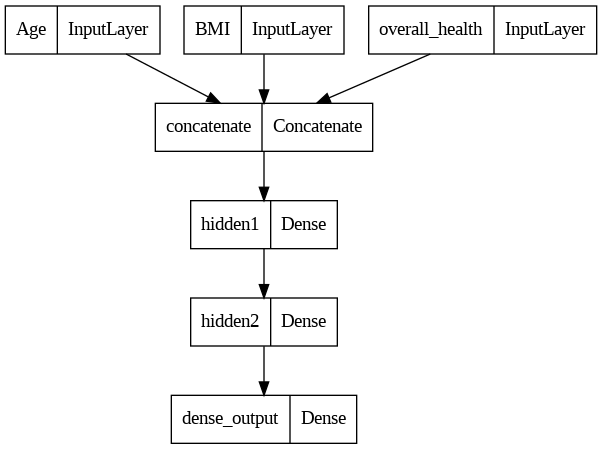

In [14]:
tf.keras.utils.plot_model(dnn_model)

In [21]:
def df_to_dataset(dataframe, labels, shuffle=True, batch_size=32):
    df = dataframe.copy()
    df = {key: value.values for key, value in dataframe.items()}
    ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
        ds = ds.batch(batch_size)
        ds = ds.prefetch(batch_size)
    return ds

train_ds = df_to_dataset(X_train, y_train)
test_ds = df_to_dataset(X_test, y_test)

In [28]:
import numpy as np
import tensorflow as tf
import pandas as pd
from keras import Sequential
from keras.layers import Dense

tf.config.run_functions_eagerly(True)

y_train = y_train.astype('float32')


history = dnn_model.fit(
    {name: np.array(value) for name, value in X_train.items()},
    np.array(y_train.values),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

epochs = history.epoch
hist = pd.DataFrame(history.history)



/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Epoch 1/15
  2/163 [..............................] - ETA: 13s - loss: 2.0438 - f1_score: 0.2340

/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighChol', 'PhysActivity', 'MentHlth', 'Unhealthy_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


163/163 [==============================] - 8s 51ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 2/15
163/163 [==============================] - 7s 41ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 3/15
163/163 [==============================] - 7s 46ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 4/15
163/163 [==============================] - 7s 41ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 5/15
163/163 [==============================] - 7s 46ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 6/15
163/163 [==============================] - 7s 41ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 7/15
163/163 [==============================] - 7s 45ms/step - loss: 2.1440 - f1_score: 0.2441 - val_loss: 2.2228 - val_f1_score: 0.2519
Epoch 8/15

In [31]:
print(history.history.keys())

dict_keys(['loss', 'f1_score', 'val_loss', 'val_f1_score'])


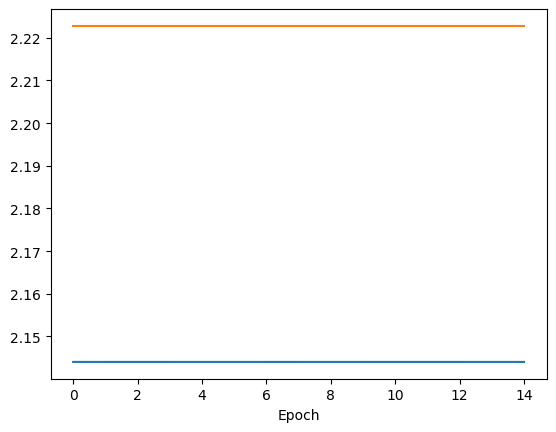

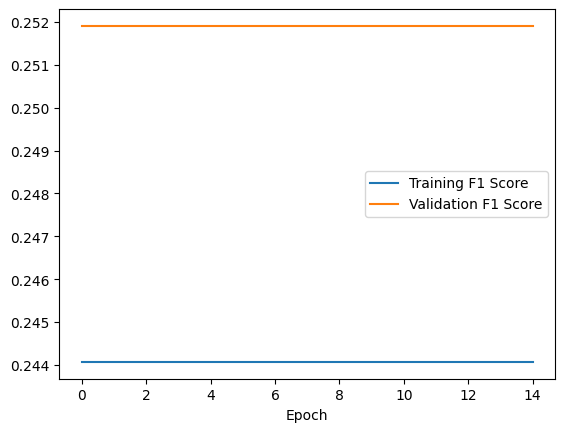

In [33]:
import matplotlib.pyplot as plt

training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
training_f1 = history.history["f1_score"]
validation_f1 = history.history["val_f1_score"]

plt.figure()
plt.xlabel("Epoch")
plt.plot(epochs, training_loss, label="Training Loss")
plt.plot(epochs, validation_loss, label="Validation Loss")

plt.figure()
plt.xlabel("Epoch")
plt.plot(epochs, training_f1, label="Training F1 Score")
plt.plot(epochs, validation_f1, label="Validation F1 Score")

plt.legend()
plt.show()


In [35]:
import numpy as np
import tensorflow as tf

# Cast y_test to float32
y_test = y_test.astype('float32')

evaluation_results = dnn_model.evaluate(
    x={name: np.array(value) for name, value in X_test.items()},
    y=np.array(y_test.values),
    batch_size=1000,
    return_dict=True
)

# Print the evaluation results
print("Evaluation results:", evaluation_results)


51/51 [==============================] - 2s 29ms/step - loss: 2.1069 - f1_score: 0.2403
Evaluation results: {'loss': 2.106884479522705, 'f1_score': array([0.2403496], dtype=float32)}


Part 4: The plot, well I have no idea what happened but it does not look correct, probably means that one of the variables is just 0. Did I have to code a z axis because if so. The f1 score was 0.2441 while the accuracy score was 0.2403 so id say these values are pretty close. It probably would not be a good classifier because this model has been sewn up like frankenstein.  